In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

In [19]:
# Fit an AutoARIMA model to the training data
model = pm.auto_arima(train_data['rj_price'], seasonal=True, m=7, trace=True)

# Print the model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=43888.731, Time=15.65 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=44599.732, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=44006.632, Time=1.22 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=43890.054, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=44597.851, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=43886.291, Time=13.50 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=43885.372, Time=9.43 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=43886.312, Time=11.52 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=43889.116, Time=3.24 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=43887.916, Time=1.66 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=43887.228, Time=7.85 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=43886.016, Time=12.67 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=43887.071, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=43885.371, Time=9.94 sec
 ARIMA(1,1,3)(1

# ORDER (3,1,4)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -21931.258
Date:                Thu, 19 Oct 2023   AIC                          43878.517
Time:                        12:49:09   BIC                          43927.851
Sample:                    01-01-2010   HQIC                         43896.118
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8374      0.098     -8.568      0.000      -1.029      -0.646
ar.L2          0.3803      0.142      2.669      0.008       0.101       0.660
ar.L3          0.6510      0.091      7.143      0.0

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


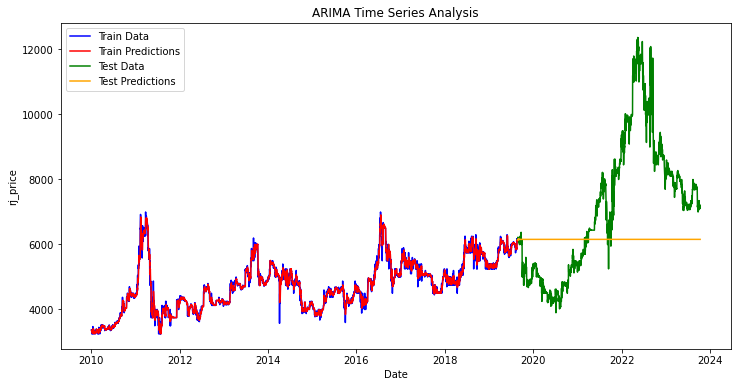

MSE 5331270.0334196435
RMSE 2308.9543160096614


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 3, 1, 4  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



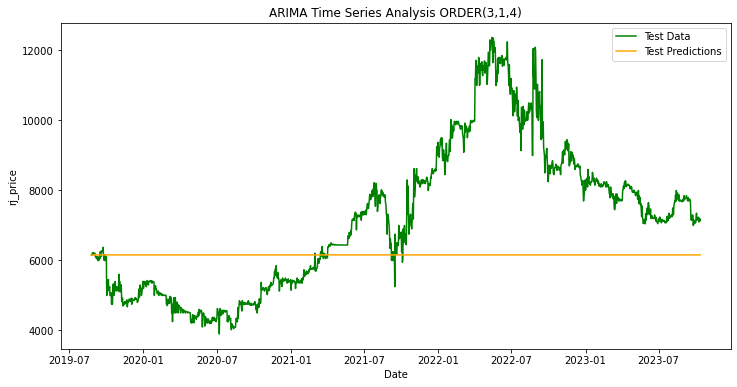

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(3,1,4)')
plt.show()

# 2 order(2,3,6)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 3, 6)   Log Likelihood              -21983.149
Date:                Thu, 19 Oct 2023   AIC                          43984.298
Time:                        11:51:26   BIC                          44039.794
Sample:                    01-01-2010   HQIC                         44004.098
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9608      0.001  -2349.315      0.000      -1.962      -1.959
ar.L2         -0.9999      0.001  -1156.100      0.000      -1.002      -0.998
ma.L1         -0.5465      0.042    -13.108      0.0

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


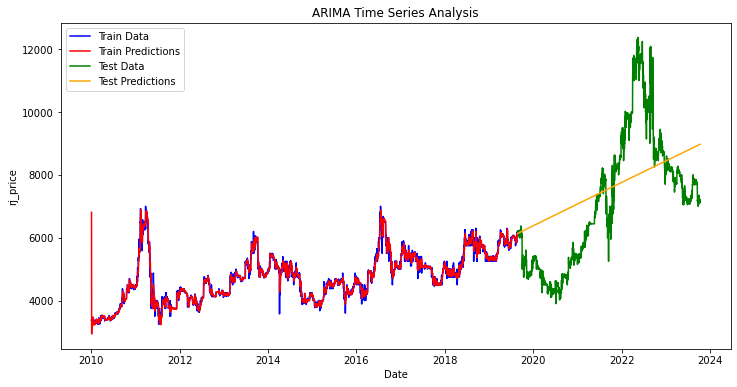

MSE 2772881.6779732457
RMSE 1665.197188915849


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 3, 6  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



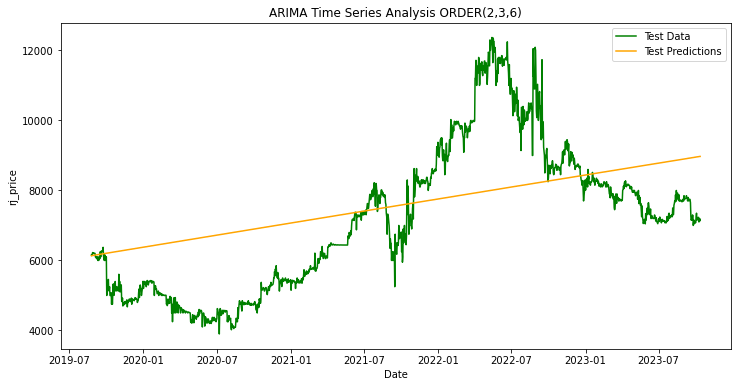

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(2,3,6)')
plt.show()

# 3 ORDER(1,1,1)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21939.773
Date:                Thu, 19 Oct 2023   AIC                          43885.545
Time:                        11:54:06   BIC                          43904.045
Sample:                    01-01-2010   HQIC                         43892.146
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0598      0.024     -2.534      0.011      -0.106      -0.014
ma.L1         -0.4142      0.022    -19.060      0.000      -0.457      -0.372
sigma2      1.508e+04    130.801    115.280      0.0

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


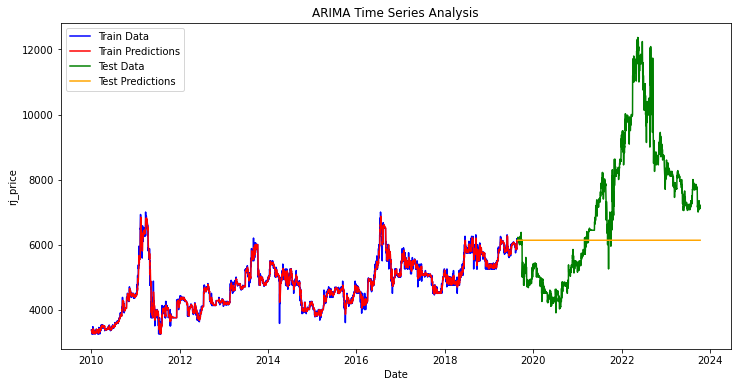

MSE 5381791.246540936
RMSE 2319.8687994239967


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 1, 1, 1  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



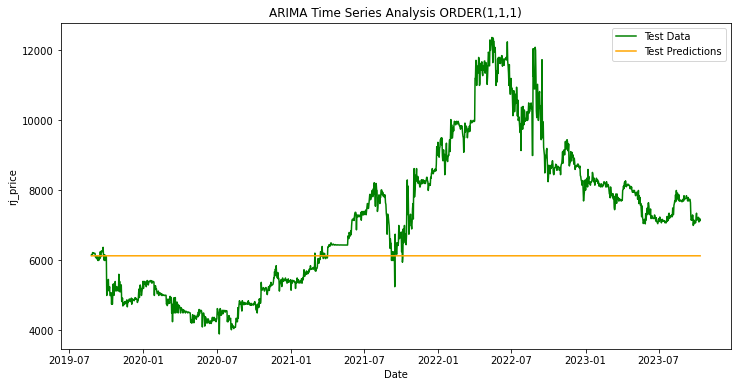

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(1,1,1)')
plt.show()

# ORDER(2,1,5)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -21932.485
Date:                Thu, 19 Oct 2023   AIC                          43880.969
Time:                        12:47:09   BIC                          43930.303
Sample:                    01-01-2010   HQIC                         43898.570
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6018      0.079    -20.261      0.000      -1.757      -1.447
ar.L2         -0.8379      0.065    -12.869      0.000      -0.965      -0.710
ma.L1          1.1295      0.080     14.092      0.0

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


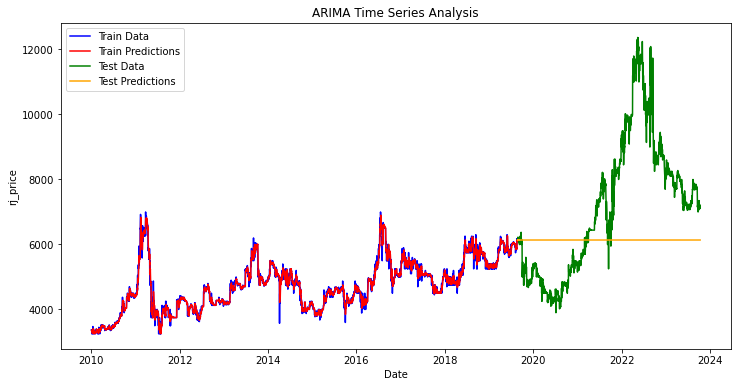

MSE 5373285.964723391
RMSE 2318.034936044621


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 1, 5  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



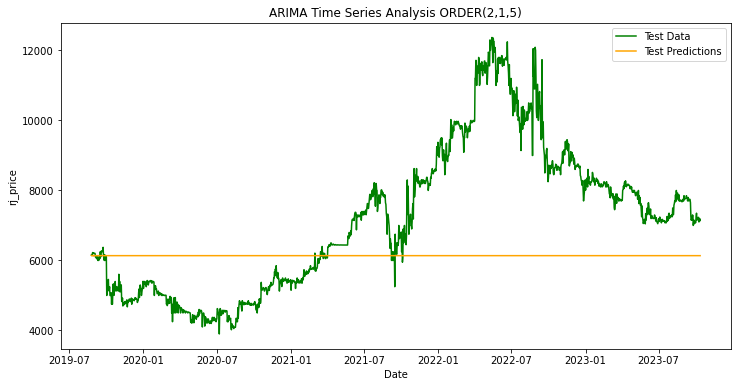

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(2,1,5)')
plt.show()

# ORDER(2,2,2)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -21998.161
Date:                Thu, 19 Oct 2023   AIC                          44006.322
Time:                        12:54:51   BIC                          44037.155
Sample:                    01-01-2010   HQIC                         44017.323
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3831      0.354     -3.912      0.000      -2.076      -0.690
ar.L2         -0.3902      0.138     -2.820      0.005      -0.661      -0.119
ma.L1         -0.0116      0.646     -0.018      0.9

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


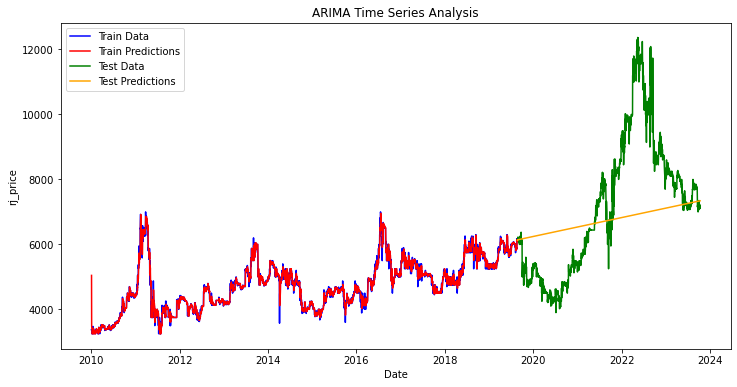

MSE 3614534.1633014097
RMSE 1901.192826438552


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 2, 2  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



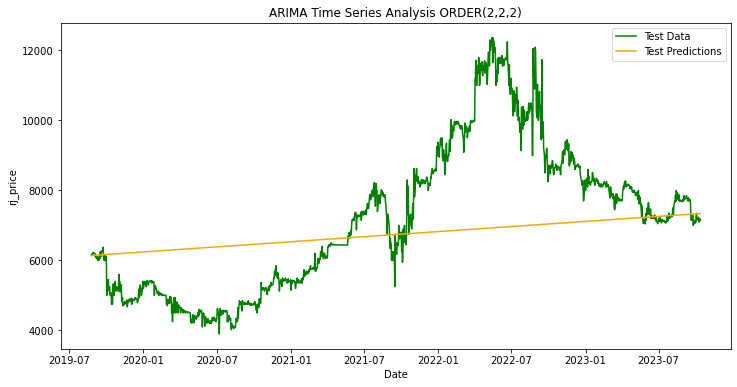

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(2,2,2)')
plt.show()

In [ ]:
#ORDER(2,2,6)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unk

                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 2, 6)   Log Likelihood              -21932.345
Date:                Thu, 19 Oct 2023   AIC                          43882.690
Time:                        13:02:06   BIC                          43938.189
Sample:                    01-01-2010   HQIC                         43902.491
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7406      0.039    -45.064      0.000      -1.816      -1.665
ar.L2         -0.9130      0.037    -24.443      0.000      -0.986      -0.840
ma.L1          0.2702      0.042      6.453      0.0

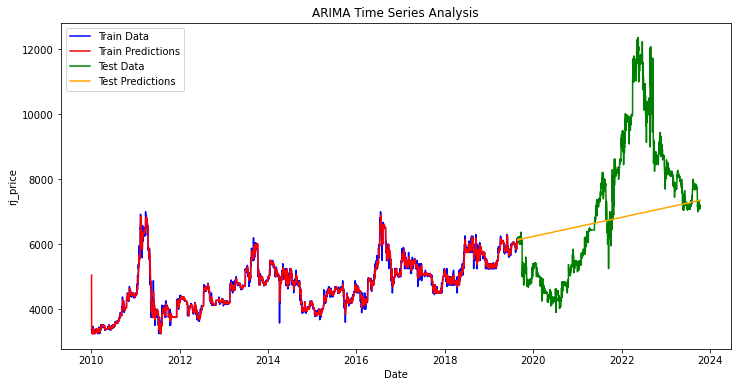

MSE 3602035.4763180423
RMSE 1897.902915409016


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 2, 6  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



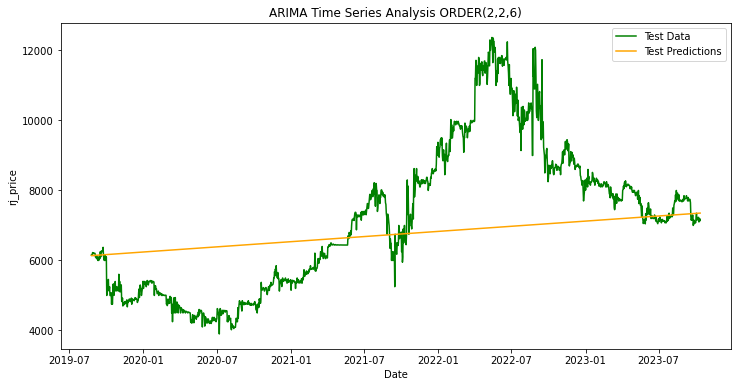

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(2,2,6)')
plt.show()

# ORDER(2,3,5)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

                               SARIMAX Results                                
Dep. Variable:               rj_price   No. Observations:                 3523
Model:                 ARIMA(2, 3, 5)   Log Likelihood              -21947.490
Date:                Thu, 19 Oct 2023   AIC                          43910.980
Time:                        13:04:20   BIC                          43960.310
Sample:                    01-01-2010   HQIC                         43928.580
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9709      0.002   -893.963      0.000      -1.975      -1.967
ar.L2         -0.9996      0.003   -389.643      0.000      -1.005      -0.995
ma.L1         -0.5010      0.085     -5.921      0.0

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


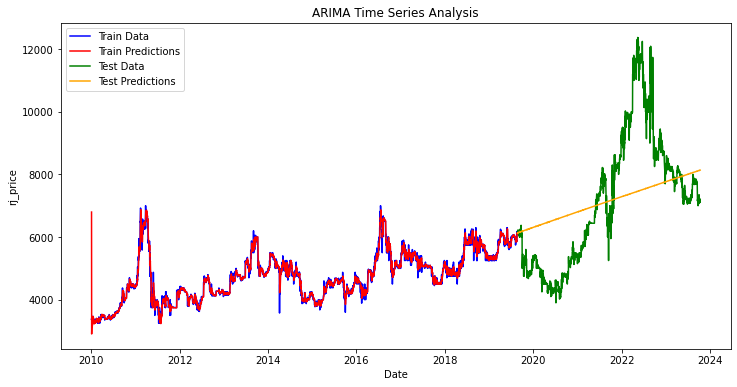

MSE 2976457.433307582
RMSE 1725.2412681441347


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
df = pd.read_csv('cotton.csv', parse_dates=['date'], index_col='date')
df = df[['rj_price']]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the p, d, and q parameters for the ARIMA model
p, d, q = 2, 3, 5  # Example values, adjust based on your data and analysis

# Create and fit the ARIMA model
model = ARIMA(train_data['rj_price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
# Make predictions on the test data
train_predictions = model_fit.predict(start=1, end=len(train_data), typ='levels')
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['rj_price'], label='Train Data', color='blue')
plt.plot(train_predictions.index, train_predictions,label='Train Predictions', color='red')
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = test_data['rj_price']
y_pred = test_predictions

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("RMSE",rmse)



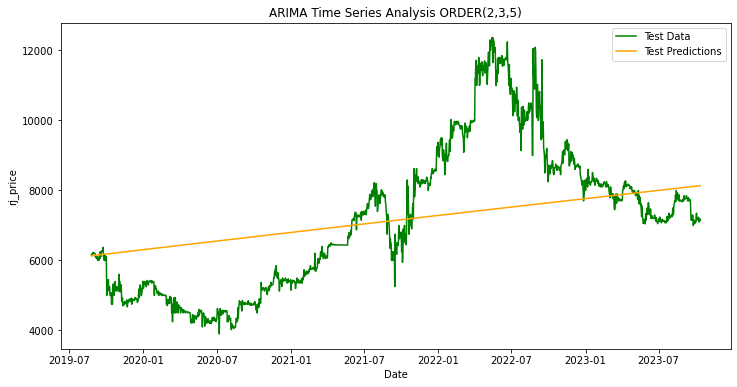

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['rj_price'], label='Test Data', color='green')
plt.plot(test_predictions.index, test_predictions, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('rj_price')
plt.legend()
plt.title('ARIMA Time Series Analysis ORDER(2,3,5)')
plt.show()